In [1]:
import numpy as np
import numpy.linalg as la
import csv
import scipy.spatial.distance as ssd
import scipy.spatial as ss
import timeit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

import pattrex.plotting_mpl as plt_rex
import pattrex.preprocessing as pre_rex
import pattrex.fitting as fit_rex
import pattrex.unit_circles as uc_rex
import pattrex.kdTreeCK as kd_rex



In [2]:
dt = np.dtype([('x', np.float), ('y', np.float), ('lable', np.float)])  # g is byte-string

data = np.loadtxt('data/data2-train.dat', dtype=dt, comments='#', delimiter=None)

x = np.array([d[0] for d in data])#x
y = np.array([d[1] for d in data])#y
lable = np.array([d[2] for d in data])#label

X = np.vstack((x, y, lable))  # data is going to be column-wise
X.shape
X_pos, X_neg = pre_rex.split_data(X, True, 2, [1.0, -1.0])
print("Positive :", X_pos.shape[1], "; Negative :", X_neg.shape[1])


Positive : 128 ; Negative : 128


<IPython.core.display.Javascript object>


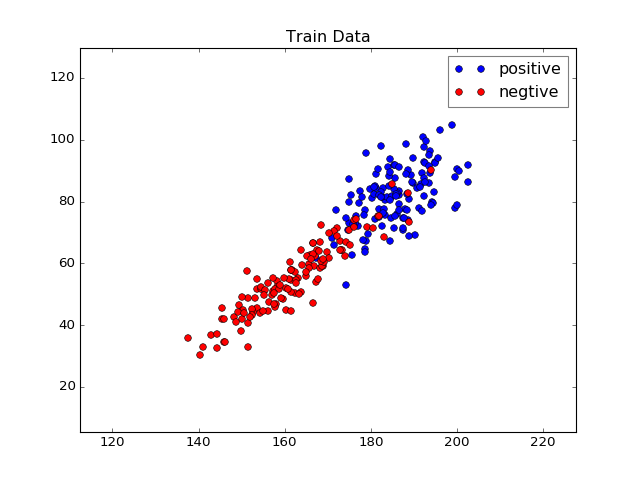

In [3]:
# plotting
fig = plt.figure()
axs = fig.add_subplot(111)

# limits for the axes
X_ = np.vstack((x, y))  # only the measurements; data is col-wise
xmin, ymin = X_.min(axis=1)
xmax, ymax = X_.max(axis=1)

xlim = [xmin-25, xmax+25]  # purely for looks
ylim = [ymin-25, ymax+25]

plt_rex.plot2d(X_pos, colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
              show=False, axs=axs, set_aspect_equal=False, plotlabel="positive")
plt_rex.plot2d(X_neg, colwise_data=True, hatch='ro', x_lim=xlim, 
               y_lim=ylim, show=False, axs=axs, set_aspect_equal=False, 
               plotlabel="negtive", title="Train Data")

In [4]:
TreeList=[]
for dim in range(2):
    for splt in range(2):
        TreeList.append(kd_rex.KDTree(X[0:2,:].T,0,dim,splt))

Depth: 0
The number of points is: 256 The dimension is: 2
SliceDimension:  0
psu_lb, After sub [[ 175.7309      104.69737551]
 [ 137.45442865   30.39378981]]
psu_rb, After sub [[ 202.65521308  104.69737551]
 [ 175.7309       30.39378981]]
175.7309
Depth: 1
The number of points is: 128 The dimension is: 2
SliceDimension:  1
psu_lb, After sub [[ 175.7309       54.10962212]
 [ 137.45442865   30.39378981]]
psu_rb, After sub [[ 175.7309      104.69737551]
 [ 137.45442865   54.10962212]]
54.1096221186
Depth: 2
The number of points is: 64 The dimension is: 2
SliceDimension:  0
psu_lb, After sub [[ 154.34186733   54.10962212]
 [ 137.45442865   30.39378981]]
psu_rb, After sub [[ 175.7309       54.10962212]
 [ 154.34186733   30.39378981]]
154.341867335
Depth: 3
The number of points is: 32 The dimension is: 2
SliceDimension:  1
psu_lb, After sub [[ 154.34186733   42.59200723]
 [ 137.45442865   30.39378981]]
psu_rb, After sub [[ 154.34186733   54.10962212]
 [ 137.45442865   42.59200723]]
42.592007

/Users/kangcifong/Documents/2015 WS/PatternRecognition/HW1/Project1/pattrex/kdTreeCK.py:38: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (bound==None):#bound==None
/Users/kangcifong/Documents/2015 WS/PatternRecognition/HW1/Project1/pattrex/kdTreeCK.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (bound==None):#bound==None


2
n: 0 ###Stopped by n, depth is  9
Depth: 9
The number of points is: 0 The dimension is: 2
n: 0 ###Stopped by n, depth is  9
Depth: 7
The number of points is: 2 The dimension is: 2
SliceDimension:  1
psu_lb, After sub [[ 193.58484182   91.97261606]
 [ 192.48433934   90.29867531]]
psu_rb, After sub [[ 193.58484182   94.57856673]
 [ 192.48433934   91.97261606]]
91.9726160592
Depth: 8
The number of points is: 1 The dimension is: 2
SliceDimension:  0
psu_lb, After sub [[ 193.43879803   91.97261606]
 [ 192.48433934   90.29867531]]
psu_rb, After sub [[ 193.58484182   91.97261606]
 [ 193.43879803   90.29867531]]
193.438798027
Depth: 9
The number of points is: 0 The dimension is: 2
n: 0 ###Stopped by n, depth is  9
Depth: 9
The number of points is: 0 The dimension is: 2
n: 0 ###Stopped by n, depth is  9
Depth: 8
The number of points is: 1 The dimension is: 2
SliceDimension:  0
psu_lb, After sub [[ 192.5053191    94.57856673]
 [ 192.48433934   91.97261606]]
psu_rb, After sub [[ 193.58484182   

<IPython.core.display.Javascript object>


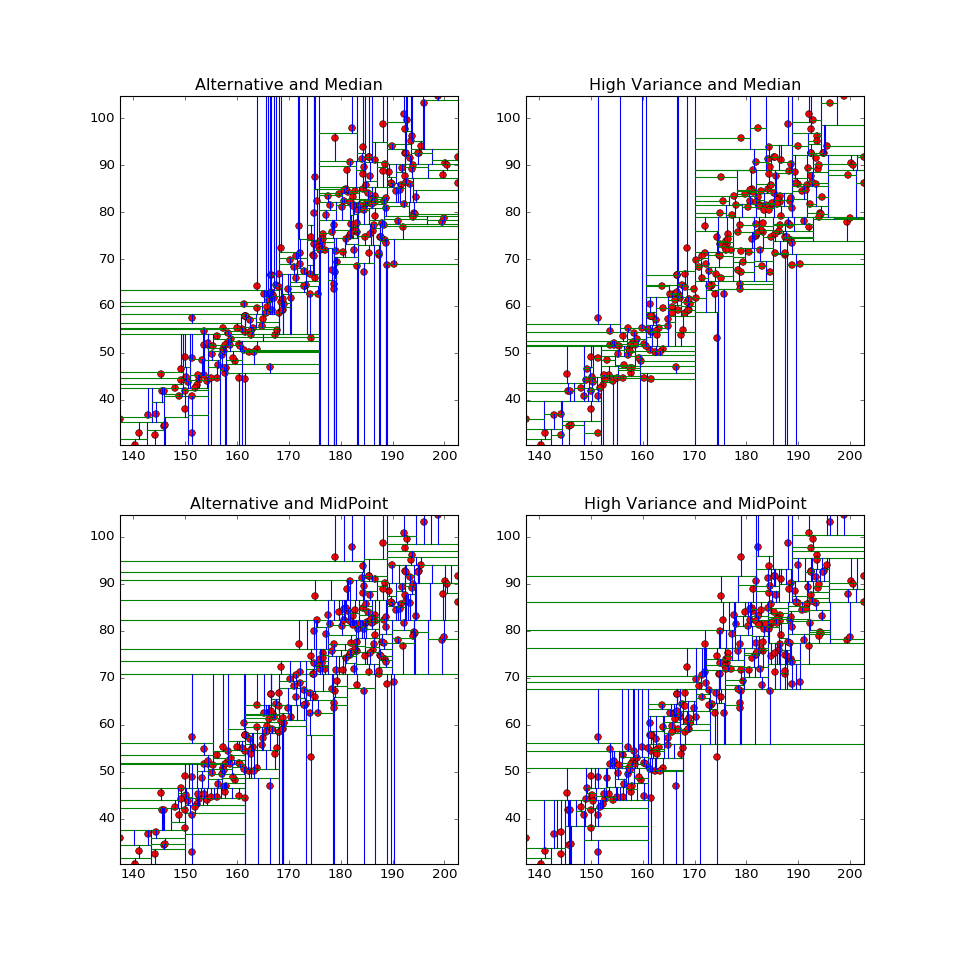

[[ 202.65521308  104.69737551]
 [ 137.45442865   30.39378981]]
max 104.697375506 min 30.393789814 mid 175.7309
[[ 175.7309      104.69737551]
 [ 137.45442865   30.39378981]]
max 175.7309 min 137.454428648 mid 54.1096221186
[[ 175.7309       54.10962212]
 [ 137.45442865   30.39378981]]
max 54.1096221186 min 30.393789814 mid 154.341867335
[[ 154.34186733   54.10962212]
 [ 137.45442865   30.39378981]]
max 154.341867335 min 137.454428648 mid 42.592007231
[[ 154.34186733   42.59200723]
 [ 137.45442865   30.39378981]]
max 42.592007231 min 30.393789814 mid 145.914920106
[[ 145.91492011   42.59200723]
 [ 137.45442865   30.39378981]]
max 145.914920106 min 137.454428648 mid 35.2259084873
[[ 145.91492011   35.22590849]
 [ 137.45442865   30.39378981]]
max 35.2259084873 min 30.393789814 mid 142.645593837
[[ 142.64559384   35.22590849]
 [ 137.45442865   30.39378981]]
max 142.645593837 min 137.454428648 mid 31.7293475974
[[ 142.64559384   31.7293476 ]
 [ 137.45442865   30.39378981]]
max 31.7293475974

In [5]:
# global_traverseCounter=0
# kd_rex.KDTreeTraverse(TreeList[0])
kd_rex.KDTreePlot2D(x,y,TreeList)